# Image Treatment

### Summary :

- [Synthesize colored images](#synthesize-images-using-numpy)
- [Change the color of an object](#change-the-color-of-an-object) # TODO
- [Enhancing images contrasts](#contrast-effect)
- [Image subsampling and anti aliasing](#image-subsampling-and-anti-aliasing)

## Synthesize images using numpy

The goal is to synthesize the following picture using `numpy` and `mathplotlib.pyplot` :
<div style="display:flex;justify-content: center;">
<img src="images/additive_colors.png">
</div>

We will consider the center of the image as the origin of the plane.
> l’angle entre l’axe horizontal et la droite qui
passe par le centre du disque rouge et le centre de l’image vaut : π/6.

So now we need to calculate the coordinates of the disks center's :

An image in `mathplotlib` is an array that begin from the upper-left with the index `0`. That's why we have to set this axes limit :
```python
ax.axis([0, BORDER_LENGTH, BORDER_LENGTH, 0])
```

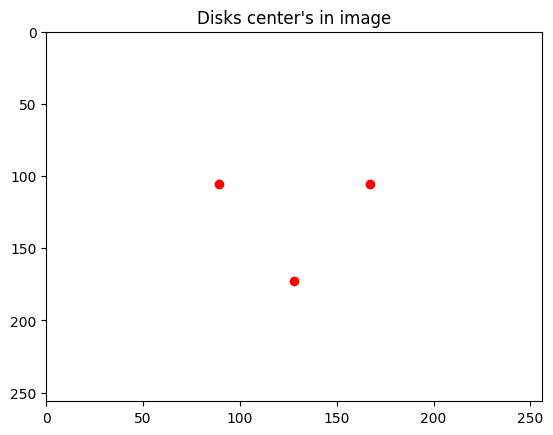

In [3]:
import numpy as np
import matplotlib.pyplot as plt

pixels = int
BORDER_LENGTH: pixels = 256
DISK_RADIUS: pixels = 70
DISTANCE_BETWEEN_CENTER_DISK: pixels = 45
ANGLE  = np.pi/6

x = float
y = float
Point = np.array([x, y])

def compute_image_center(border_length: pixels) -> Point:
    center = border_length // 2
    return [center, center]


center = compute_image_center(BORDER_LENGTH)
x_center, y_center = center

x_polar = DISTANCE_BETWEEN_CENTER_DISK * np.cos(ANGLE)
y_polar = DISTANCE_BETWEEN_CENTER_DISK * np.sin(ANGLE)

red_center: Point = [x_center - x_polar, y_center - y_polar]
green_center: Point = [x_center + x_polar, y_center - y_polar]
blue_center: Point = [x_center , y_center + DISTANCE_BETWEEN_CENTER_DISK]

x_red, y_red = red_center
x_green, y_green = green_center
x_blue, y_blue = blue_center

fig, ax = plt.subplots()
ax.set_title("Disks center's in image")
ax.axis([0, BORDER_LENGTH, BORDER_LENGTH, 0])
ax.plot([x_red, x_green, x_blue], [y_red, y_green, y_blue], 'ro')
plt.show()

Now we are going to compute the mask of a disk where all pixel inside the disk have the value `0` (purple), and all pixels outside have the value `255` (yellow).
- First we compute the matrix of the distance between a disk center point and all the image pixels.

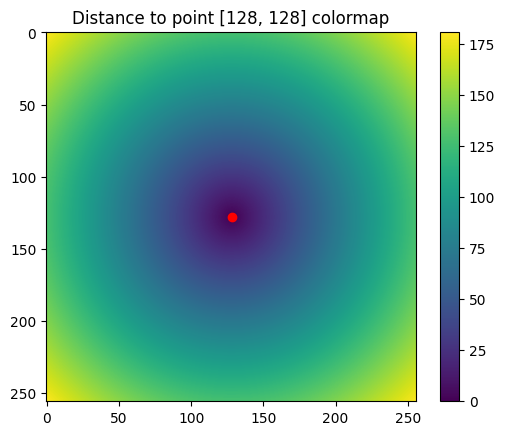

In [4]:

def compute_distance(point1: Point, point2: Point):
    x_1, y_1 = point1
    x_2, y_2 = point2
    return  np.sqrt((x_2-x_1)**2 + (y_2-y_1)**2)


def distance_to_point_matrix(point: Point, border_length: int) -> np.ndarray:
    distance_to_point = np.empty((border_length, border_length), dtype='float32')
    for x in range(border_length):
            for y in range(border_length):
                distance_to_point[x,y] = compute_distance(point, [x,y])
    return distance_to_point


def plot_image_matrix(point: Point, matrix: np.ndarray[Point]):
    plt.plot(point[0], point[1], 'ro')
    plt.imshow(matrix)


distance_to_center = distance_to_point_matrix(center, BORDER_LENGTH)
plot_image_matrix(center, matrix=distance_to_center) 
plt.title(f"Distance to point {center} colormap")
plt.colorbar()
plt.show()

- Now we can compute the masks 

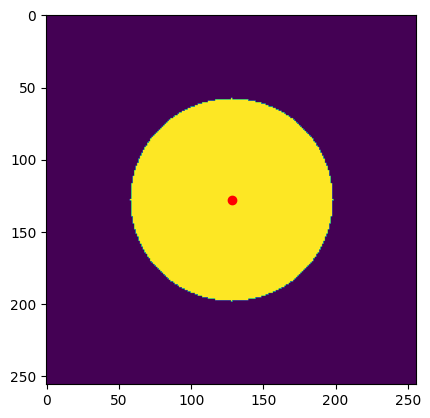

In [5]:
mask = np.zeros((BORDER_LENGTH, BORDER_LENGTH), dtype='uint8')

def is_in_circle( distance_center: float, radius: pixels) -> bool:
    if distance_center <= radius :
        return True
    return False

for x, row in enumerate(distance_to_center):
    for y, distance in enumerate(row):
        if is_in_circle(distance, DISK_RADIUS):
            mask[x,y] = 255

_, ax =plt.subplots()
plot_image_matrix(center, mask)
plt.show()

We could also use the `numpy.ndarray` to compute the matrices:
- Using `np.meshgrid` instead of `for loops` to compute the distance matrix 
>Great [explanation of `meshgrid` purpose](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)  
- Using `boolean` array to compute the mask.

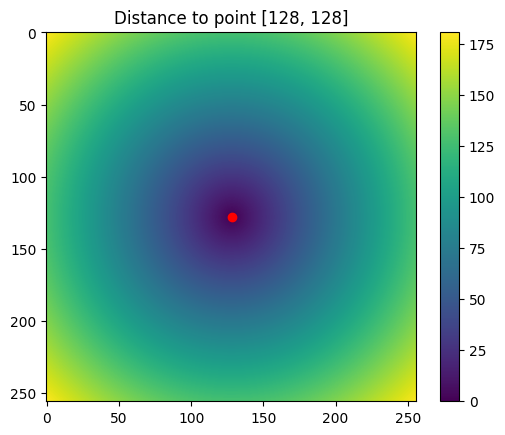

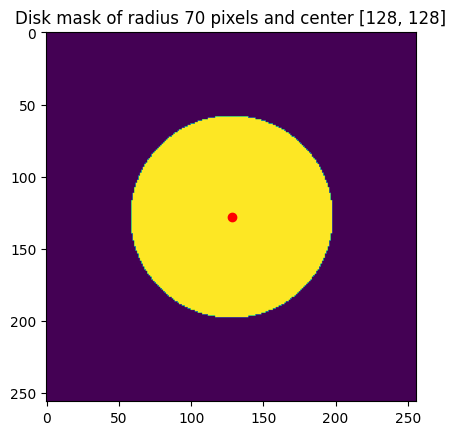

In [6]:

def meshgrid_distance_to_point_matrix(center: Point, border_length: int):
    x_center, y_center = center
    x = np.arange(border_length)
    y = np.arange(border_length)
    xx, yy = np.meshgrid(x, y)
    distance_matrix = np.sqrt((xx-x_center)**2 + (yy-y_center)**2)
    return distance_matrix

distance_to_center = meshgrid_distance_to_point_matrix(center, BORDER_LENGTH)
plot_image_matrix(center, distance_to_center)
plt.title(f'Distance to point {center}')
plt.colorbar()
plt.show()

def create_mask(distance_matrix, pixel_value = 255)-> np.ndarray:
    mask = np.zeros((BORDER_LENGTH, BORDER_LENGTH), dtype='uint8')
    mask [distance_matrix < DISK_RADIUS ] += pixel_value 
    return mask

mask = create_mask(distance_to_center)
plot_image_matrix(center ,mask)
plt.title(f"Disk mask of radius {DISK_RADIUS} pixels and center {center}")
plt.show()

And finally, we can use all the functions and previous center points coordinates to print the final picture.

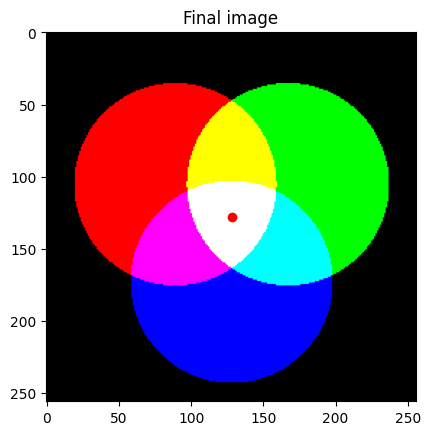

In [7]:
red_distance = meshgrid_distance_to_point_matrix(red_center, BORDER_LENGTH)
green_distance = meshgrid_distance_to_point_matrix(green_center, BORDER_LENGTH)
blue_distance = meshgrid_distance_to_point_matrix(blue_center, BORDER_LENGTH)
red_mask = create_mask(red_distance)
green_mask = create_mask(green_distance)
blue_mask = create_mask(blue_distance)

# image[x,y]= [red: int, green: int, blue: int]
image = np.dstack((red_mask, green_mask, blue_mask))
plot_image_matrix(center,image)
plt.title("Final image")
plt.show()

## Change the color of an object

In [8]:
#TODO

## Contrast effect

We're going to apply a convolve filter  to this scipy image `face` to enhance the contrasts

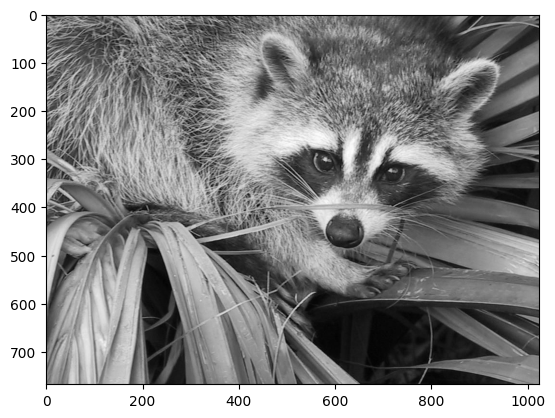

In [64]:
import scipy
image = scipy.misc.face(gray = True).astype('float')
plt.imshow(image, cmap="gray")
plt.show()

#### Creating the mask
We're going to create a $3\times 3$ mask to enhance contrast.
We'll need to use some edge detection mask ([wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing))) and we'll add some gain parameter :  
- The matrix we have is: $ \frac{1}{9} \times \begin{bmatrix} -\gamma &-\gamma &-\gamma \\ -\gamma & 9+8\gamma &-\gamma  \\-\gamma & -\gamma &-\gamma \end{bmatrix}$   , $\gamma$ is the gain.

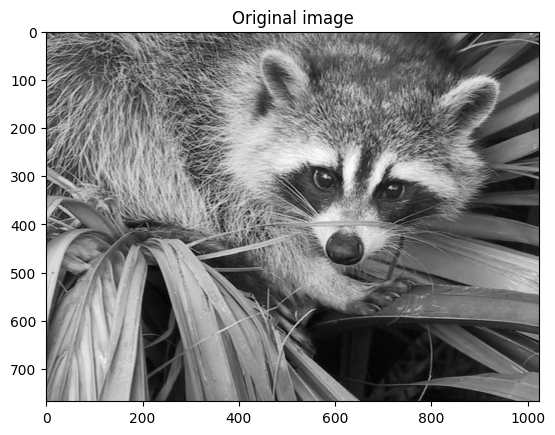

None

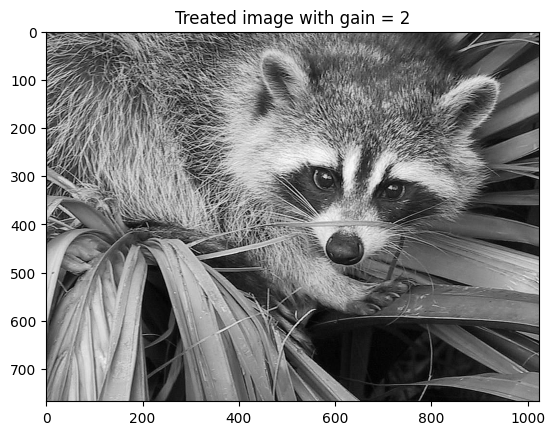

None

In [69]:
LENGTH_FILTER: int = 3
GAIN: float = 2

def create_convolve_filter(length: int, gain: float):
    number_pixels = length * length
    middle = int(  length // 2  )
    filter = np.zeros( shape=(length, length) )
    filter[middle][middle] = number_pixels + gain * number_pixels
    filter -= gain
    filter = filter / 9
    return filter

filter = create_convolve_filter(LENGTH_FILTER, GAIN)
treated_image = scipy.ndimage.convolve(image, filter)
treated_image[ treated_image < 0 ] = 0
treated_image[ treated_image > 255 ] = 255

# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.imshow(image, cmap='gray')
# ax1.set_title("Original image")
# ax2.imshow(treated_image, cmap='gray')
# ax2.set_title(f"Treated image with gain = {GAIN}")
plt.imshow(image, cmap='gray')
plt.title("Original image")
display(plt.show())

plt.imshow(treated_image, cmap='gray')
plt.title(f"Treated image with gain = {GAIN}")
display(plt.show())

Now comparing with **Sobel filter**

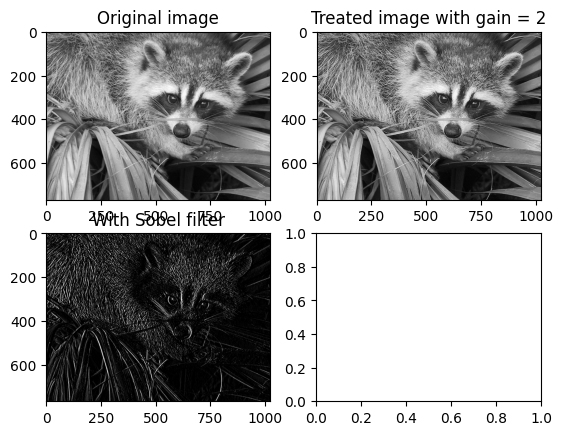

In [71]:
sobel_image = scipy.ndimage.sobel(image)
sobel_image[ sobel_image < 0 ] = 0
sobel_image[ sobel_image > 255 ] = 255

fig, (ax1, ax2) = plt.subplots(2, 2)
ax1[0].imshow(image, cmap='gray')
ax1[0].set_title("Original image")
ax1[1].imshow(treated_image, cmap='gray')
ax1[1].set_title(f"Treated image with gain = {GAIN}")
ax2[0].imshow(sobel_image, cmap='gray')
ax2[0].set_title(f"With Sobel filter")
plt.show()

### Image Subsampling and anti-aliasing

**Image subsampling** : Reducing the number of pixels of an image by only keeping a sample of original image pixels. 
> Used to compress images 


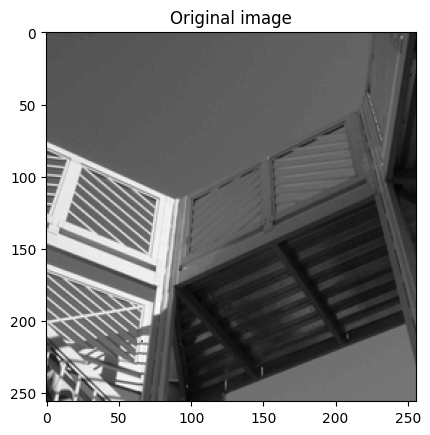

None

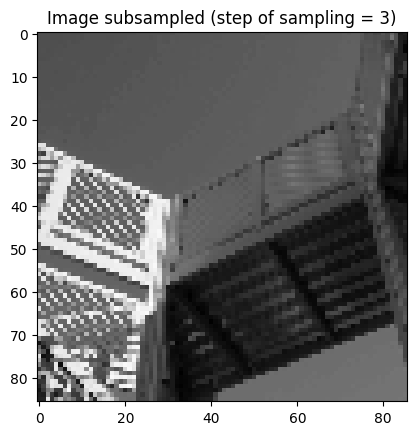

None

In [87]:
image = scipy.misc.ascent().astype('float')
image = image[:256, :256] # Only the corner of the image

STEP = 3 # we only select every 3 pixels of the image
sub_sampled_image = image[::STEP, ::STEP]

plt.imshow(image, cmap='gray')
plt.title("Original image")
display(plt.show())

plt.imshow(sub_sampled_image, cmap='gray')
plt.title(f"Image subsampled (step of sampling = {STEP})")
display(plt.show())

As we can see above, sampling causes **aliasing** to appear in the image. To reduce this aliasing we use an anti-aliasing filter before subsampling the image.


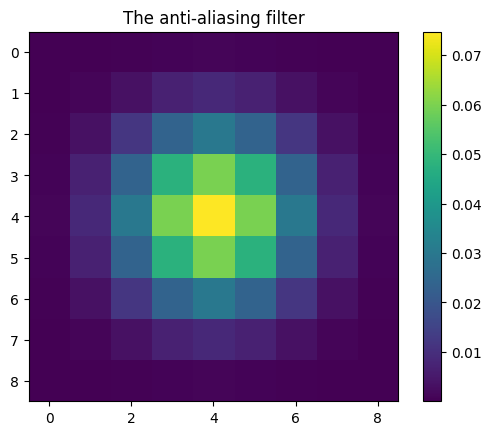

None

In [83]:
def create_anti_aliasing_filter(length):
    vector_filter = 1/length * np.array([[ 1, 8, 28, 56, 70, 56, 28, 8, 1 ]])
    filter = vector_filter.T @ vector_filter
    return filter

filter = create_anti_aliasing_filter(256)

plt.title("The anti-aliasing filter")
plt.imshow(filter)
plt.colorbar()
display(plt.show())


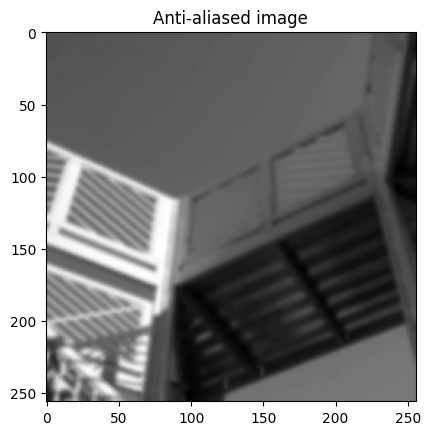

None

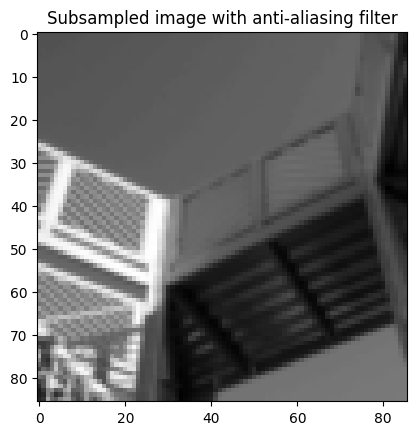

None

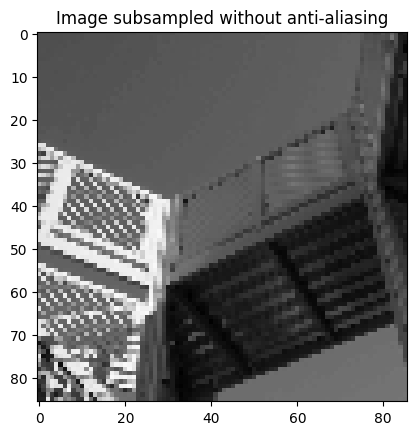

None

In [88]:
anti_aliased_image = scipy.ndimage.convolve(image, filter)
anti_aliased_image[ anti_aliased_image < 0 ] = 0
anti_aliased_image[ anti_aliased_image > 255 ] = 255
sub_sampled_and_anti_aliased = anti_aliased_image[::STEP,::STEP]

plt.title("Anti-aliased image")
plt.imshow(anti_aliased_image, cmap="gray")
display(plt.show())

plt.title("Subsampled image with anti-aliasing filter")
plt.imshow(sub_sampled_and_anti_aliased, cmap='gray')
display(plt.show())


plt.imshow(sub_sampled_image, cmap='gray')
plt.title(f"Image subsampled without anti-aliasing")
display(plt.show())